# YZ세대 잡힐까 말까 잡힐까 말까? 정답은 유튜브!
### Y&Z세대 주식 투자 경향 분석 및 활용 방안- 투자자 선호도 중심으로

#### **목차**
* __서론__  

* __본론__  
  1. 데이터 전처리
  2. 투자자 시각화
  3. Y&Z세대에게 가장 인기있는 산업군은 무엇일까
  4. Y&Z세대 투자는 체결가격에 영향을 받았을까
  5. Y&Z세대의 인기 종목은 무엇일까
  6. Y&Z세대 투자 횟수가 많은 기업들의 재무재표 지표 분석
  7. Y&Z세대 개별 투자자들에게 어떤 종목을 추천해줄 수 있을까
 
* __결론__   
 

#### **사용 데이터 목록**

* 2_act_info.csv
* 2_cus_info.csv
* 2_trd_kr.csv
* 2_iem_info.csv
* 산업군.csv: 지수<산업분류<KRX지수산업분류<산업별현황 12월 18일 data
(시장구분, 종목코드, 종목명, 산업분류, 현재가, 전일대비, 시가총액)
http://marketdata.krx.co.kr/mdi#document=undefined
* 2030_count.csv: 20-30대 투자횟수가 높은 회사 top 60를 선정하여 각 회사의 2019.12월, 2020년 3월, 2020년 6월 PER, ROE, 부채비율 조사 후 평균값을 구한 데이터(출처:네이버 금융)

----------

## __서론__  

코로나19 이후 적극적으로 주식 매수에 나서는 개인투자자들이 증가하며, “동학개미운동”과 같은 신조어를 만들어내고 있다. 특히, 집값 상승에 좌절한 20, 30세대 개미들이 주식 공부 열풍과 함께 주식 투자 열풍을 일으키고 있다.

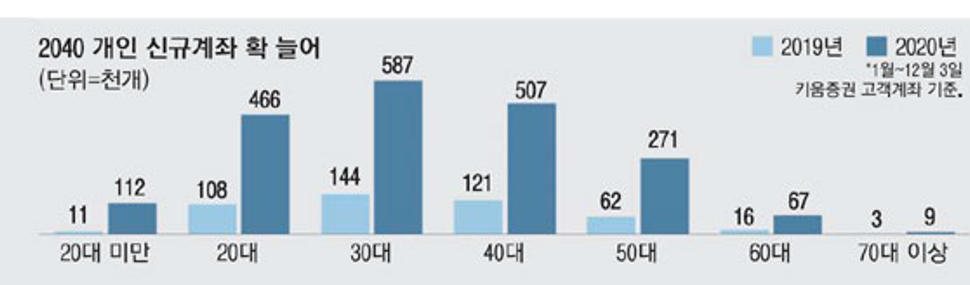
<div style="text-align: center"> *출처: 매일경제(https://www.mk.co.kr/news/stock/view/2020/12/1279378/) </div>


Y&Z세대 개인 투자자들은 적극적으로 정보를 수집하고 판단하는 ‘스마트 개미’를 지향한다. 그들은 특히 SNS, 유튜브와 같은 뉴미디어를 통해 최신 투자 정보를 접하고 공부한다. 이에 수십만 명의 구독자를 거느린 주식 유튜버가 탄생하기도 했으며, 국내 증권사들 또한 유튜브 채널을 만들고 영상을 올리며 구독자를 늘리고 있다. 
   
Youtube Search 기준 구글트렌드 검색량을 확인해 보았을 때도, 키워드 ‘주식’이 점진적으로 증가하며 많은 사람들이 유튜브를 통해 주식 정보를 얻고 있음을 알 수 있었다. 

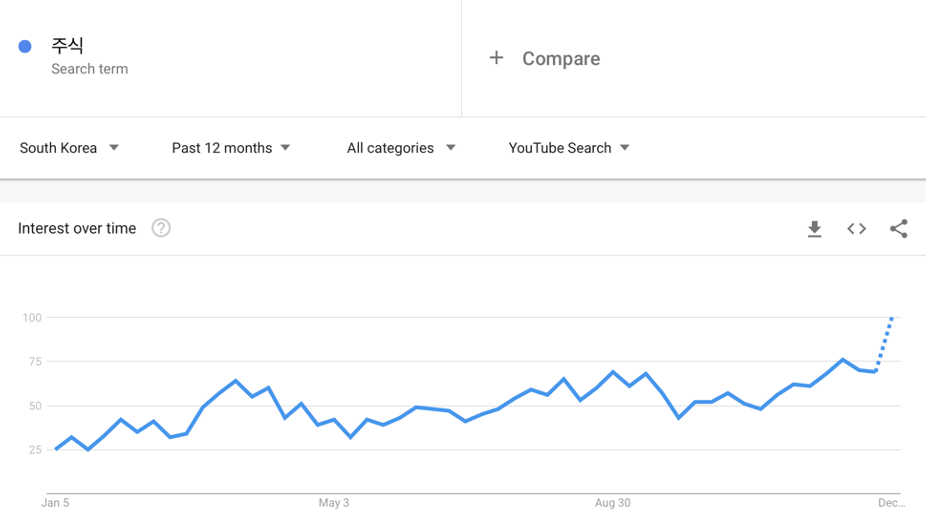
<div style="text-align: center"> *출처:구글트렌드(검색어-주식)https://trends.google.co.kr/trends/explore?geo=KR&gprop=youtube&q=%EC%A3%BC%EC%8B%9D </div>


NH투자 증권 또한 자체 유튜브 채널을 가지고 있다. 하지만 NH투자 증권의 구독자 수는 현재 약 2만2천명이며 타 증권사의 구독자수에 비하면 약 ⅕ 수준에 그치고 있다. 

따라서 본 팀은 Y&Z세대의 투자경향을 분석하고 이를 접목한 주식 종목 추천 시스템을 제시한다. 이를 활용하여 NH 투자증권 유튜브 채널을 활성화시키는 마케팅 전략을 제안한다. 

-----

In [1]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [2]:
# 디렉토리 지정
import os 

# 기본 라이브러리
import pandas as pd 
import numpy as np
from datetime import * 
import math

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

-----------------------

## __본론2. 투자자 시각화__ 

### __2-1. 투자자 10000명 시각화__

Text(0.5, 1.0, '투자자 나이대 분포')

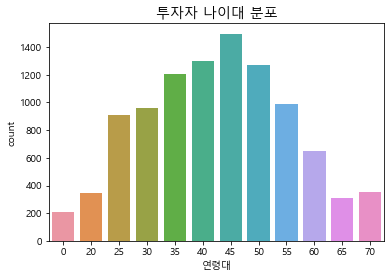

In [11]:
#나이대 분포
ax=sns.countplot(cus_info['연령대'].sort_values())
ax.set_title('투자자 나이대 분포', size=14)

-----------------------

-----------------------

## 본론6. Y&Z세대 투자 횟수가 많은 기업들의 재무재표 지표 분석

Y&Z세대 투자자들이 주식투자를 할 때 재무재표 지표를 고려하여 투자를 하는지 알아보기 위해 먼저 Y&Z세대 투자횟수가 많은 회사 top60를 추출하였다. 그다음에 네이버 금융에서 제공하는 각 회사별 2019.12월 2020.3월, 2020.6월 PER, ROE, 부채비율 값의 평균을 내어 새로운 데이터를 만들었다. 

In [59]:
# y%z대 투자횟수 많은 회사 top 60 재무재표 지표 데이터
YZinvest=pd.read_csv('2030_count.csv')
YZinvest.head()

,종목명,count,PER,ROE,부채비율
0,삼성전자,16195,16.463333,8.543333,33.660000
1,SK하이닉스,5650,33.346667,4.076667,38.163333
2,씨젠,5571,33.220000,44.136667,44.526667
3,국일제지,5153,-24.490000,NaN,145.986667
4,파미셀,5101,196.596667,9.596667,22.366667


Text(0.5, 1.0, '종목별 PER')

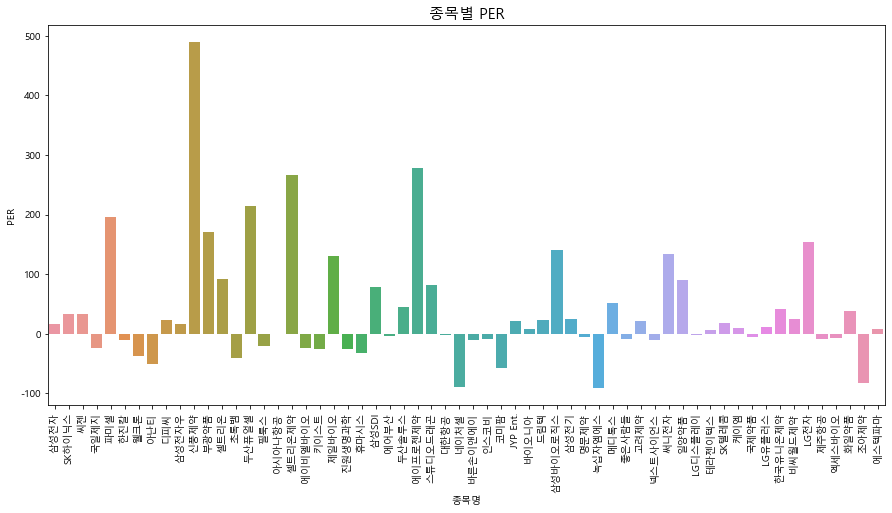

In [60]:
#회사별 PER 그래프
plt.figure(figsize=(15,7))
sns.barplot(YZinvest['종목명'],YZinvest['PER'])
plt.xticks(rotation=90)
plt.title('종목별 PER', size=15)

- PER은 주가/주당순이익을 계산한 것으로 회사의 주식가치를 보여주는 재무재표 지표이다.
- 따라서 투자자들에게 인기가 많을수록 PER이 높을 거라는 가정 후 그래프를 그려보았다. 하지만 위 그래프를 보면 Y&Z세대가 많이 투자를 했다고 해서 PER이 높은 경향성은 보이지 않는다.

In [61]:
# PER 구간 나눠서 점수 부여
per_num = []
for i in YZinvest['PER']:
  if i >=20:
    per_num.append(5)
  elif i >=10:
    per_num.append(4)
  elif i >=0:
    per_num.append(3)
  elif i >=-10:
    per_num.append(2)
  elif i>= -20:
    per_num.append(1)
  else:
    per_num.append(0)

YZinvest['per_num'] = per_num

PER지수를 6개 구간으로 나눠서 낮은 순에서 높은 순으로 0,1,2,3,4,5 점을 부여한 새로운 변수 per_num을 생성하였다.

Text(0.5, 1.0, '종목별 ROE')

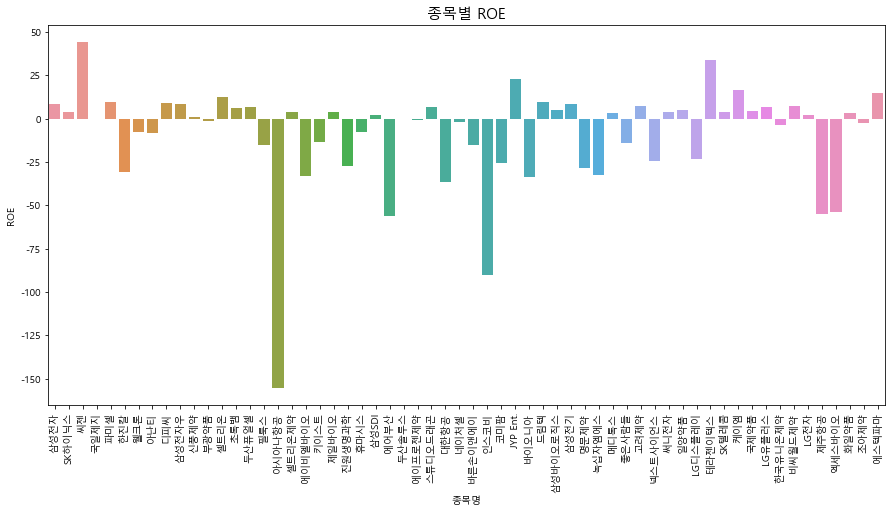

In [62]:
# 회사별 ROE 그래프
plt.figure(figsize=(15,7))
sns.barplot(YZinvest['종목명'],YZinvest['ROE'])
plt.xticks(rotation=90)
plt.title('종목별 ROE', size=15)

* ROE는 당기순이익/자기자본을 계산한 것으로 자기자본의 운영이 얼마나 효율적으로 이루어졌는지 반영하는 지표이다.
* 따라서 투자자들에게 인기가 많을수록 ROE가 높을 거라는 가정 후 그래프를 그려보았다. 하지만 위 그래프를 보면 Y&Z세대가 많이 투자를 했다고 해서 ROE가 높은 경향성은 보이지 않는다.

In [63]:
# ROE 구간 나눠서 점수 부여
roe_num = []
for i in YZinvest['ROE']:
  if i >=20:
    roe_num.append(5)
  elif i >=10:
    roe_num.append(4)
  elif i >=0:
    roe_num.append(3)
  elif i >=-10:
    roe_num.append(2)
  elif i >=-20:
    roe_num.append(1)
  else:
    roe_num.append(0)

YZinvest['roe_num'] = roe_num

ROE지수를 6개 구간으로 나눠서 낮은 순에서 높은 순으로 0,1,2,3,4,5 점을 부여한 새로운 변수 roe_num을 생성하였다.

Text(0.5, 1.0, '종목별 부채비율')

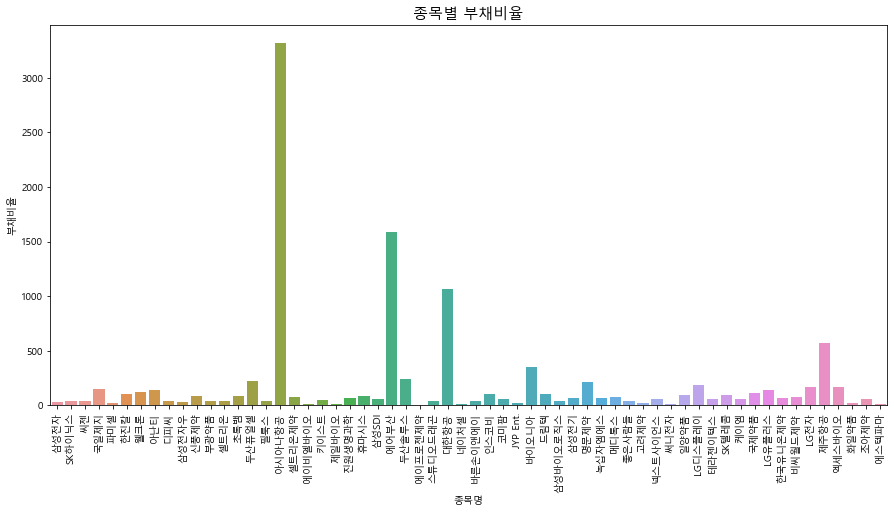

In [64]:
#회사별 부채비율 그래프
plt.figure(figsize=(15,7))
sns.barplot(YZinvest['종목명'],YZinvest['부채비율'])
plt.xticks(rotation=90)
plt.title('종목별 부채비율', size=15)

항공관련 회사가 유독 부채비율이 높음을 시각적으로 확인할 수 있다.

In [65]:
# 부채비율 구간 나눠서 점수 부여, 점수가 높을수록 작은 부채비율
debt_num = []
for i in YZinvest['부채비율']:
  if i >=250:
    debt_num.append(0)
  elif i >=200:
    debt_num.append(1)
  elif i >=150:
    debt_num.append(2)
  elif i>=100:
    debt_num.append(3)
  elif i>=50:
    debt_num.append(4)
  else:
    debt_num.append(5)

YZinvest['debt_num'] = debt_num

부채비율지수를 6개 구간으로 나눠서 부채비율이 높은 순에서 낮은 순으로 0,1,2,3,4,5 점을 부여한 새로운 변수 debt_num을 생성하였다.

In [66]:
# per_num, roe_num, debt_num 평균내서 투자가치 지표 생성
YZinvest['invest_num']=(YZinvest['per_num']+YZinvest['roe_num']+YZinvest['debt_num'])/3

PER,ROE,부채비율을 종합한 새로운 변수 invest_num을 생성하였다.

Text(0.5, 1.0, '종목별 투자가치 지표')

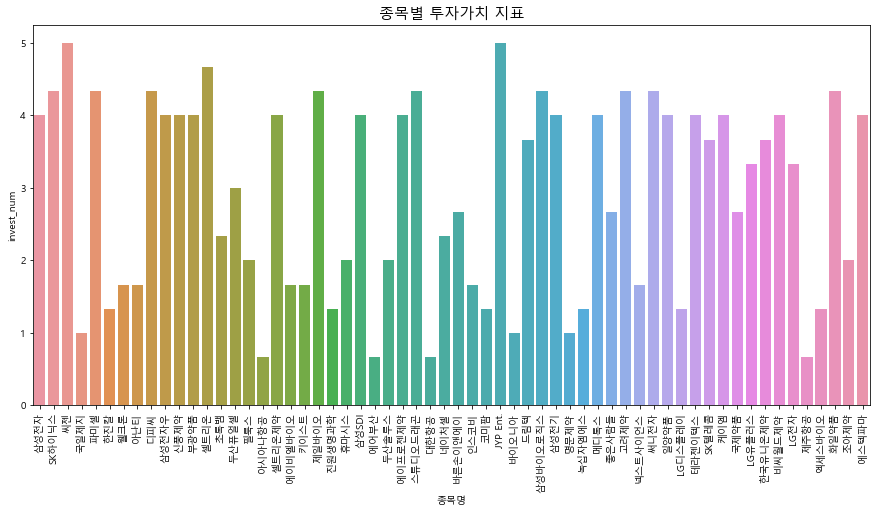

In [67]:
#투자가치 지표 그래프
plt.figure(figsize=(15,7))
sns.barplot(YZinvest['종목명'],YZinvest['invest_num'])
plt.xticks(rotation=90)
plt.title('종목별 투자가치 지표', size = 15)

Y&Z세대 투자자들에게 인기가 많을수록 invest_num이 높을거라는 가정 후 그래프를 그려보았으나 invest_num이 높은 경향성은 보이지 않는다.

-----------------------

## 결론 및 제언

### __1. 고객의 등급, 투자성향에 따른 개별 선호도를 파악하여 ‘대세’ 기업 추천__  

본론의 알고리즘을 통해 고객의 등급과 투자성향별 고객의 기업별 선호도를 파악할 수 있다. 이를 통해 Y&Z세대가 가장 많이 투자 하는 '대세' 기업 중 해당 고객의 선호도가 높은 종목을 추천함으로써, 고객은 단순 인기 종목 추천이 아닌, 개인 맞춤형 인기 종목을 추천받을 수 있다. 이는 투자 경험이 있는 고객에게는 물론 투자 경험이 없는 '주린이'들의 주식 시장 진입 장벽을 낮춰줌으로써 본인이 선호하는 기업을 찾아 수익을 창출해내는 과정을 통해 만족도를 높인다. 투자 경험이 어느 정도 있는 고객에 대해서는 투자 지표와 관련된 가이드를 추가적으로 제시하면서 투자 경험과 전문 지식을 모두 갖춘 투자자로서 수익률을 높일 수 있는 방안을 마련한다. 

### __2. SNS 콘텐츠 개발의 필요성__  

한국 2030세대의 가장 큰 투자 특징은 투자 정보를 소셜미디어에서 얻는다는 것이다.
정보통신정책연구원에 따르면, 2019년 기준 유튜브를 포함한 SNS(Social Network Service) 이용률은 47.7%이며, 국내 소비자들의 유튜브 사용 시간은 월간 442억분으로 1년 전에 비해 약 39.4% 증가하였다. 유튜브(Youtube)는 2020년 9월 기준으로 유튜브 앱 사용자가 전체 인구의 83%(4319만 명)으로, 유튜브 어플의 1인당 월평균 사용 시간이 29.5시간 정도이며 카카오톡 앱서비스의 사용량의 2.45배이다. 

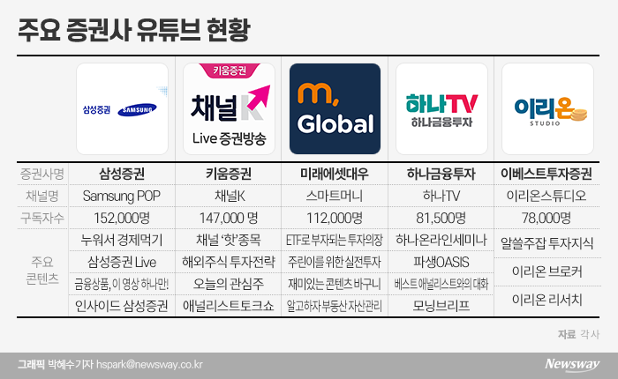
<div style="text-align: center"> *출처: 뉴스웨이(http://www.newsway.co.kr/news/view?tp=1&ud=2020122315232923100) </div>

또한, 2020년 주식 개미들의 신규 투자가 증가하면서 증권사들 유튜브 구독자 수도 빠르게 증가하고 있는 추세이다. 개인 주식 투자 유튜브 채널보다는 증권사에서 운영하는 유튜브 채널이 신뢰도가 더 높아 관련 유튜브 컨텐츠를 개발한다면 NH투자증권에서 YZ세대 투자자들을 사로잡을 수 있을 것이다.

### __3. 유튜브 콘텐츠 다양화__  

#### __(1) 컨셉, 캐릭터 활용__  

* 벤치마킹 예시1: 삼성증권 유튜브 채널 ‘Samsung POP’의 ‘절세의 검’ 캠페인 영상 

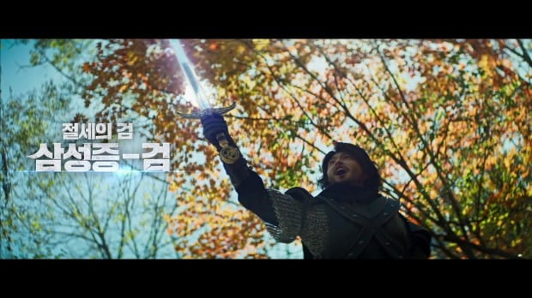

본편 500만뷰 이상을 기록한 이 영상은 중세 판타지 게임 광고를 보는 듯한 영상미에 절세를 돕는 전설의 검을 언어유희를 활용한 ‘삼성증-검’으로 이름을 붙여 재미요소를 더했다.  



* 벤치마킹 예시2: 빙그레의 빙그레우스(인스타그램을 활용한 마케팅)

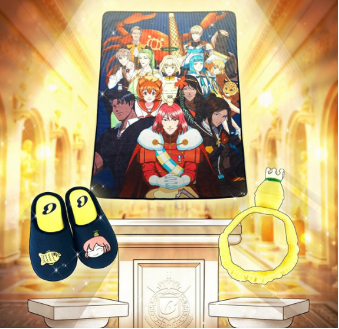

빙그레는 올해 초 ‘빙그레우스 더 마시스’ 라는 꽃미남 캐릭터를 자사 인스타그램에 등장시켜 자사 제품 홍보에 사용하였다. 그 결과 빙그레우스 게시물 업로드 이전에는 팔로워 수가 9만명 수준이었지만 현재 약 15만명으로 약 50%의 팔로워 수 증가 하였다. 또한 중장년층 브랜드 이미지를 탈피하고 YZ세대뿐만이 아니라 다른 세대에서도 많은 인기를 얻었다.

따라서 NH투자증권도 캐릭터나 YZ세대가 흥미를 가질만한 컨셉을 활용한 SNS 컨텐츠를 본격적으로 제작할 필요가 있다.


#### __(2) Y&Z세대가 쉽게 관심 가질 만한 주제를 접목한 컨텐츠__  

* 벤치마킹 예시1: 삼성증권 유튜브 채널 ‘Samsung POP’ 고독한 투자자 시리즈
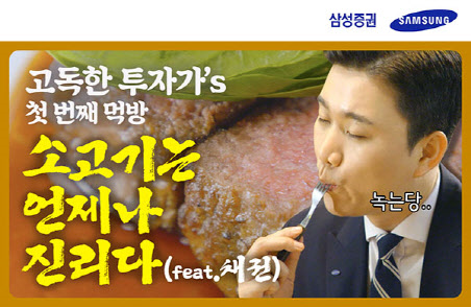

유명 일본 드라마 고독한 미식가를 패러디하여 금융상품과 경제용어를 소고기나 햄버거에 비유해 쉽고 재미있게 풀어 설명함으로써, 투자자들의 금융투자에 대한 용이한 접근을 이끌어냈다. 그 결과, 1편 조회수는 46만회, 2편 조회수는 53만회를 기록했다.

따라서, 재미있고 참신한 소재를 활용한 캠페인이나 광고 영상으로 NH투자증권 유튜브 채널 유입을 증가시킬 수 있고 나아가  NH투자증권 유튜브 채널의 다른 컨텐츠를 찾아보거나 구독하는 방향으로 이끌 수 있다.


### __4. 영상 콘텐츠 활용__  


* 다양화된 영상 콘텐츠는 NH 투자증권 앱과 웹 사이트 등에서도 활용될 수 있다. 영상은 짧은 시간 안에 흡입력 있게 고객을 끌어들여 보다 효율적인 방법으로 사용자들에게 정보를 전달할 수 있다는 장점을 가진다. 고객의 투자 정보를 바탕으로 본론에서 제시한 추천 시스템을 통해 선호도를 예측하고, 선호도가 높은 인기 종목에 대한 NH투자증권에서 제작한 관련 유튜브 영상도 추천한다. 이는 고객 맞춤형 유튜브 콘텐츠를 추천하여 다양한 산업군과 종목에 대한 지식과 경험을 얻을 수 있게 한다는 점에서 매우 유용하다. 

* 또한, 유튜브 콘텐츠는 소비자가 또 하나의 생산자가 될 수 있다는 점에서 또다른 홍보효과를 얻을 수 있다. 예를 들어, NH 투자증권을 통해 성공적으로 투자한 투자자들이 제작한 콘텐츠를 공유함으로써 다양한 사람들의 실제 투자 경험 전달을 통해 Y&Z세대를 끌어들일 수 있다. 

* 이는 커뮤니티 활성화로도 이어질 수 있다. Y&Z세대는 커뮤니티에 대한 의존도가 높다는 특성이 있다. 커뮤니티 활동은 일반 고객 뿐만 아니라 신규 유입 고객도 주식 시장에 쉽게 접근할 수 있게 한다. 또한, 커뮤니티로 접한 정보들을 통해 고객은 일명 주식 ‘인싸’로서 활동할 수 있게 된다.


### 참고문헌

추천시스템 참고문헌-파이썬 머신러닝 완벽 가이드: 권철민 지음